# <center> <h1>    🤖  🧑‍💻  🧑

In [47]:
from ultralytics import YOLO

In [48]:
model = YOLO("runs/detect/train2/weights/best.pt")

In [49]:
model.export(format="onnx")
#ONNX: starting export with onnx 1.16.1 opset 17...
#ONNX: export success  42.1s, saved as 'runs\detect\train2\weights\best.onnx' (11.7 MB)

#Export complete (44.9s)
#Results saved to D:\IT\Python\YOLO\yolo\runs\detect\train2\weights
#Predict:         yolo predict task=detect model=runs\detect\train2\weights\best.onnx imgsz=640  
#Validate:        yolo val task=detect model=runs\detect\train2\weights\best.onnx imgsz=640 data=/content/gdrive/MyDrive/Datasets/Face Detection_v18/data.yaml  
#Visualize:       https://netron.app

#'runs\\detect\\train2\\weights\\best.onnx'


# <center> ONNX
### <center> ONNX yoki Open Neural Network Exchange - bu chuqur o'rgatish modellarini ifodalash uchun ochiq formatdir. U turli xil chuqur o'rgatish tizimlari o'rtasida o'zaro muvofiqlikni ta'minlash uchun ishlab chiqilgan bo'lib, bir frameworkda o'qitilgan modelni, bashorqat qilishda boshqa frameworkda ishlatish imkonini beradi(Ya'ni biz modelni Tensorflowda o'qitib uni Pytorch orqali bashorat qilishda ishlatishimiz mumkin). ONNX chuqur o'rgatish modellarida ishlatiladigan umumiy operatorlar va ma'lumotlar turlarini belgilaydi, bu esa modellarni TensorFlow, PyTorch va shunga o'xshash boshqa tizimlar o'rtasida konvertatsiya qilish imkonini beradi. Ushbu o'zaro almashinish turli platformalar va muhitlarda modellarni joylashtirishni soddalashtiradi.

# <center> 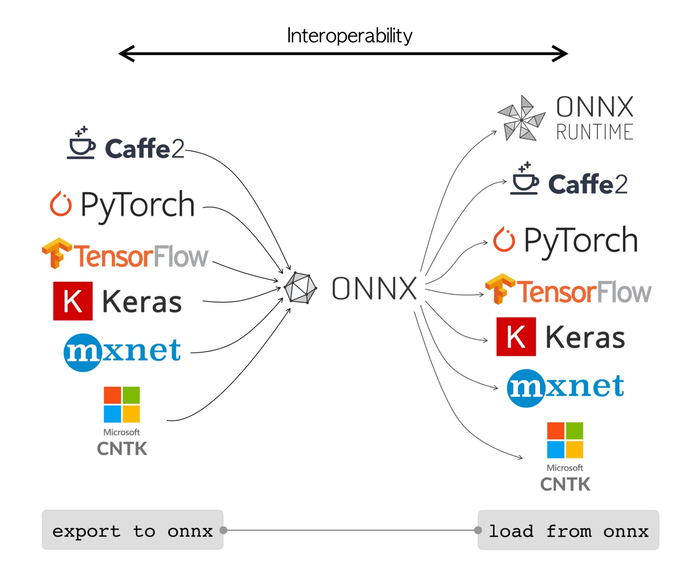

# <center> ONNX Runtime
### <center> ONNX Runtime - bu ONNX modellarini ishlab chiqarish muhitiga joylashtirish uchun mo'ljallangan mexanizmi. U turli xil apparat platformalarida, jumladan CPU, GPU va maxsus tezkor xotiralarda ONNX modellarining yuqori unumdorlik bilan ishlashini ta'minlaydi. ONNX Runtime samaradorlik va kengayish uchun mo'ljallangan bo'lib, modellarni har xil qurilmalarga, bulutli serverlarga va ularning orasidagi hamma narsaga joylashtirish imkonini beradi. U juda ko'p qurilmalarni qo'llab-quvvatlaydi, bu esa uni chuqur o'rgatish modellarini real ilovalarida qo'llash uchun ko'p qirrali tanlovga aylantiradi.


# <center> 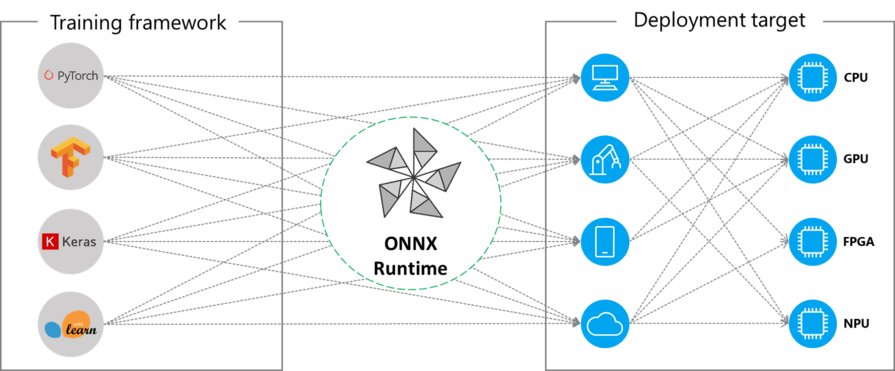

In [1]:
import onnxruntime as ort
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
"""
onnxruntime.SessionOptions() - Ushbu kod ONNX Runtime uchun sessiya obyektini yaratadi.
SessionOptions obyekti ONNX modellaringizni ishga tushirish uchun turli xil parametrlar va 
konfiguratsiyalarni sozlash imkonini beradi.
"""

ort_session = ort.SessionOptions()
ort_session

In [3]:
"""
enable_mem_pattern - parametri ONNX Runtime-da xotira pattern-nidan foydalanish uchun ishlatiladi. 
Xotira patterni(Memory pattern) - bu mashinali o'rgatish modellarini bajarishda mavjud RAMdan yaxshiroq foydalanishni ta'minlaydigan
optimallashtirish usuli. Bu, ayniqsa, katta modellar yoki xotira resurslari cheklangan qurilmalarda ishlaganda, xotiraga
bosimni kamaytirish va ish faoliyatini yaxshilashga yordam beradi.

enable_mem_pattern = "True" ga o'rnatilganda, ONNX Runtime modelni bajarish uchun ajratilgan xotirani tahlil
qiladi va uni ma'lum xotiraga kirish patternlarida tartibga solishga harakat qiladi. Bu ma'lumotlarni nusxalash
operatsiyalari sonini kamaytiradi va xotira taqsimotini optimallashtiradi, bu esa unumdorlikni oshirishga va tizimga bosimni 
kamaytirishga olib kelishi mumkin.
"""
ort_session.enable_mem_pattern = True

In [4]:
"""
opt_session.enable_cpu_mem_arena - bu markaziy protsessorda (CPU) modellarni 
ishga tushirish uchun "CPU xotira arenasi" deb nomlanuvchi ichki xotirani boshqarish mexanizmidan foydalanish imkonini beradi.
Ushbu mexanizm protsessorda xotirani qismlarga ajratadi va ularni qayta ishlatadi,bu esa xotira optimallashtirishga olib keladi.
"""
ort_session.enable_cpu_mem_arena = True

In [5]:
"""
graph_optimization_level - Bu ONNX Runtime dasturidagi grafik optimallashtirish darajasi boʻlib,
modelni bajarish samaradorligini oshirish uchun qoʻshimcha optimallashtirish imkonini beradi. 
ORT_ENABLE_EXTENDED - Ushbu daraja yoqilganda, ONNX Runtime kengroq optimallashtirish to'plamini qo'llaydi, bu esa 
resurslardan samaraliroq foydalanishga va modelning tezroq bajarilishiga olib kelishi mumkin.

GraphOptimizationLevel::ORT_DISABLE_ALL -> Barcha optimallashtirishlarni o'chiradi.
GraphOptimizationLevel::ORT_ENABLE_BASIC -> Asosiy optimallashtirishni yoqadi.
GraphOptimizationLevel::ORT_ENABLE_EXTENDED -> Asosiy va kengaytirilgan optimallashtirishni yoqadi.
GraphOptimizationLevel::ORT_ENABLE_ALL -> Barcha mavjud optimallashtirishlarni, jumladan, tartibni optimallashtirishni yoqadi.
"""
ort_session.graph_optimization_level = ort.GraphOptimizationLevel.ORT_ENABLE_EXTENDED

In [6]:
EP_list = ['CUDAExecutionProvider', 'CPUExecutionProvider']

In [8]:
# onnx modelimizni yuklab olamiz
ort_session = ort.InferenceSession("runs\\detect\\train2\\weights\\best.onnx", providers=EP_list)

In [9]:
# kiruvchi rasmimizni o'lcahmini to'girlab olamiz [1 x 3 x 640 x 640]
def preprocess(image):
    # rasmni kerakli olchamga olib kelamiz
    img = cv2.resize(image, (640, 640))
    img = img.transpose(2, 0, 1)
    img = img[np.newaxis, :, :, :].astype(np.float32)
    img /= 255.0
    return img

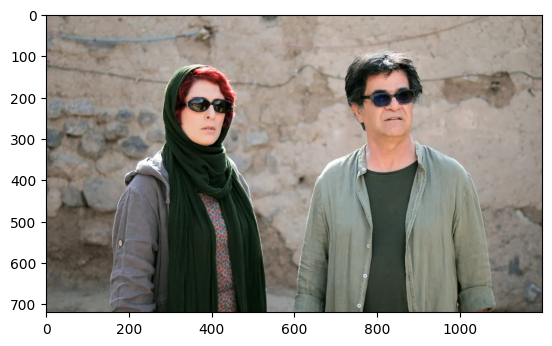

In [10]:
image = cv2.imread("Photo/1690.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [11]:
image.shape

(720, 1200, 3)

In [13]:
img = preprocess(image)
img.shape
# rasmimizni ol'chamini to'girlab oldik

(1, 3, 640, 640)

In [14]:
type(img)

numpy.ndarray

# <center> INFERENCE 

### <center> INFERENCE - bu Mashinali o'rgatishda yangi ma'lumotlardan bashorat qilish uchun o'qitilgan modelni qo'llash jarayonini anglatadi. Bu allaqachon mavjud ma'lumotlar bo'yicha o'qitilgan modelimizning, yangi ma'lumotlar orqali bashorat qilish bosqichidir.

Inferens odatda quyidagi bosqichlarni o'z ichiga oladi:

* Ma'lumotlarni tayyorlash: Inference qilinadigan yangi ma'lumotlar modelni o'rgatish uchun ishlatiladigan ma'lumotlar bilan bir xil formatda tayyorlanadi. Bu ma'lumotlarni oldindan qayta ishlash, normallashtirish va o'zgartirishni o'z ichiga olishi mumkin.

* Modelni yuklash: O'qitilgan model xulosa chiqarish uchun xotiraga yuklanadi. Bu yuklash modelining og'irliklari, arxitektura va boshqa parametrlarni o'z ichiga olishi mumkin.

* Modelni yangi ma'lumotlarga qo'llash: Yangi ma'lumotlar modelga kirish sifatida beriladi, keyinchalik ular bashorat qilish yoki natijalarni chiqarish uchun ishlatiladi.

* Natijalarni sharhlash: Inference qilish natijasida olingan natijalar odatda ma'lum bir vazifaga muvofiq talqin qilinadi va foydalaniladi. Misol uchun, model rasmdagi ob'ektlarni aniqlash uchun ishlatilsa, natijalar topilgan ob'ektlarni kordinatalari va qaysi sinfga tegishliligi bo'lishi mumkin.

Inference mashinali o'rgarish modellarini amaliy dasturlarda qo'llashning asosiy bosqichi bo'lib, unda model obyektni aniqlash, matnni tasniflash, har xil prognozlash va boshqalar kabi muayyan muammolarni hal qilish uchun real ma'lumotlarga qo'llaniladi.

In [15]:
#                                                             INFERENCE
# bizga birinchi bo'lib kirish kerak, yani modelimiz qanday ma'lumotlarni qabul qilishi, bizda bu rasm va uning o'lchami
ort_inputs = {ort_session.get_inputs()[0].name: img}
ort_inputs

{'images': array([[[[0.30980393, 0.30980393, 0.29411766, ..., 0.32941177,
           0.3137255 , 0.29803923],
          [0.5647059 , 0.5647059 , 0.5529412 , ..., 0.6039216 ,
           0.5764706 , 0.54901963],
          [0.5921569 , 0.5882353 , 0.57254905, ..., 0.6156863 ,
           0.59607846, 0.5686275 ],
          ...,
          [0.40784314, 0.3882353 , 0.38431373, ..., 0.2784314 ,
           0.27058825, 0.26666668],
          [0.42745098, 0.4       , 0.39215687, ..., 0.2627451 ,
           0.25490198, 0.2509804 ],
          [0.44313726, 0.41568628, 0.40784314, ..., 0.24705882,
           0.23921569, 0.23137255]],
 
         [[0.25882354, 0.25882354, 0.24313726, ..., 0.2901961 ,
           0.27450982, 0.2627451 ],
          [0.5137255 , 0.50980395, 0.5019608 , ..., 0.5647059 ,
           0.5372549 , 0.50980395],
          [0.5411765 , 0.53333336, 0.52156866, ..., 0.5764706 ,
           0.5529412 , 0.5254902 ],
          ...,
          [0.41568628, 0.39215687, 0.3882353 , ..., 0.278

#### `{ort_session.get_inputs()[0].name: img}`:  Biz Python lug'atini yaratamiz, bu erda kalit modelning birinchi kirish tenzorining nomi (ort_session.get_inputs()[0].name) va qiymat NumPy massivi, ya'ni rasmimiz. Shunday qilib, biz model kirishlarini mos keladigan kirish tenzor nomlari bilan bog'laymiz.


In [16]:
# kirish malumotlarimizni run() orqali modelga beramiz va chiqish malumotlarini ham olamiz
ort_outs = ort_session.run(None, ort_inputs)
ort_outs

[array([[[1.13300591e+01, 1.35177679e+01, 1.42991028e+01, ...,
          5.72851868e+02, 5.82625610e+02, 5.88242737e+02],
         [1.32144022e+01, 7.95732880e+00, 4.75502300e+00, ...,
          5.71254578e+02, 5.56541382e+02, 5.53101318e+02],
         [2.26922226e+01, 2.61044407e+01, 2.92515030e+01, ...,
          1.30824249e+02, 1.12603699e+02, 1.02901123e+02],
         [2.65443020e+01, 1.60208683e+01, 9.93334770e+00, ...,
          1.37501862e+02, 1.66191833e+02, 1.72068939e+02],
         [2.09808350e-05, 2.01463699e-05, 1.40964985e-05, ...,
          9.05990601e-06, 1.81496143e-05, 1.86860561e-05]]], dtype=float32)]

In [17]:
ort_outs2 = np.array(ort_outs)
ort_outs2.shape
# chiqish ma'lumotlarining o'lchami

(1, 1, 5, 8400)

In [18]:
boxes, scores = [], []
# bounding-box, score

In [19]:
detections = ort_outs[0][0]
detections
# modelimiz topgan qiymatlar

array([[1.13300591e+01, 1.35177679e+01, 1.42991028e+01, ...,
        5.72851868e+02, 5.82625610e+02, 5.88242737e+02],
       [1.32144022e+01, 7.95732880e+00, 4.75502300e+00, ...,
        5.71254578e+02, 5.56541382e+02, 5.53101318e+02],
       [2.26922226e+01, 2.61044407e+01, 2.92515030e+01, ...,
        1.30824249e+02, 1.12603699e+02, 1.02901123e+02],
       [2.65443020e+01, 1.60208683e+01, 9.93334770e+00, ...,
        1.37501862e+02, 1.66191833e+02, 1.72068939e+02],
       [2.09808350e-05, 2.01463699e-05, 1.40964985e-05, ...,
        9.05990601e-06, 1.81496143e-05, 1.86860561e-05]], dtype=float32)

In [20]:
detections.shape
# 5 bu bizda bbox-ning kordinatalari va aniqligi
# 8400 esa bu topilgan bboxlar(train jarayonidagi)

(5, 8400)

In [21]:
frame_shape = image.shape #(720, 1200, 3)
# yuqoridagi yuklab olgan rasmimimizning o'lchamlari

In [22]:
for detection in detections.T:  # 8400x5 qilib olamiz
        confidence = detection[4] # detection[4] bu bizning aniqlik darajamiz
        if confidence > 0.5:  # aniqlik darajasi 0.5 dan baland bo'lsa bbox larni olamiz
            x_center, y_center, width, height = detection[:4]
            print(f"Detection kordinatalar: {x_center}, {y_center}, {width}, {height}")
            # Yuqori chap va pastki o'ng burchaklarni kordinatalarini hisoblaymiz, frame_shape-ga nisbatan.
            x1 = int((x_center - width / 2) * frame_shape[1] / 640) 
            y1 = int((y_center - height / 2) * frame_shape[0] / 640)
            x2 = int((x_center + width / 2) * frame_shape[1] / 640)
            y2 = int((y_center + height / 2) * frame_shape[0] / 640)
            # Koordinatalar rasm ichida ekanligiga ishonch hosil qilamiz
            x1 = max(0, min(x1, frame_shape[1]))
            y1 = max(0, min(y1, frame_shape[0]))
            x2 = max(0, min(x2, frame_shape[1]))
            y2 = max(0, min(y2, frame_shape[0]))
            boxes.append([x1, y1, x2, y2])
            scores.append(confidence)
print(f"Rasm o'lchamiga mos kodrinatalar: {boxes}")
print(f"Aniqlik darajalari: {scores}")

Detection kordinatalar: 203.57095336914062, 205.49127197265625, 77.55970764160156, 160.30291748046875
Detection kordinatalar: 203.97402954101562, 204.90872192382812, 77.86399841308594, 161.8900146484375
Detection kordinatalar: 436.2636413574219, 192.36044311523438, 83.02362060546875, 166.7529754638672
Detection kordinatalar: 437.0205078125, 192.14544677734375, 79.30032348632812, 164.70404052734375
Detection kordinatalar: 437.4881591796875, 192.47232055664062, 78.87472534179688, 161.23974609375
Detection kordinatalar: 203.9051513671875, 206.51162719726562, 76.463134765625, 155.08042907714844
Detection kordinatalar: 204.012451171875, 205.78643798828125, 75.59385681152344, 155.63037109375
Detection kordinatalar: 203.92544555664062, 205.24130249023438, 76.83845520019531, 157.21051025390625
Detection kordinatalar: 436.73333740234375, 187.41632080078125, 95.81991577148438, 185.91209411621094
Detection kordinatalar: 203.5970458984375, 204.8272705078125, 84.23715209960938, 165.4293670654297
De

In [23]:
len(boxes)

18

In [24]:
len(scores)

18

In [25]:
# Non-Maximum Suppression
index = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.5, nms_threshold=0.4)
print(f"NMS index: {index}")
# shartimizni qanoatlantituvchi bboxlarimiz va scorelarimiz indexlari

NMS index: [17 16]


In [26]:
if len(index) > 0:
    nms_boxes = [boxes[i] for i in index.flatten()]
    nms_scores = [scores[i] for i in index.flatten()]
else:
    nms_boxes = []
    nms_scores = []

In [27]:
nms_boxes, nms_scores

([[735, 114, 899, 314], [306, 141, 456, 322]], [0.7727914, 0.7597878])

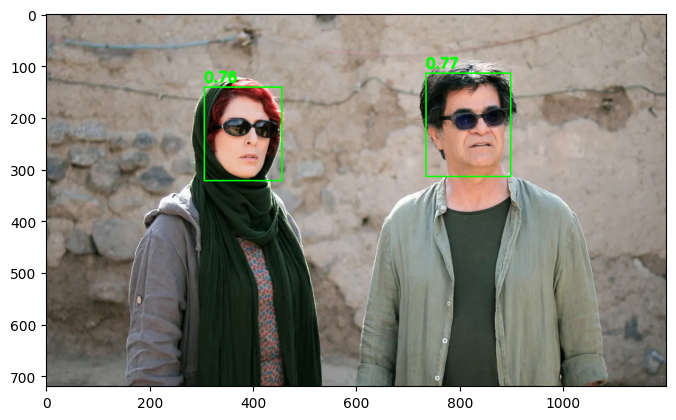

In [28]:
image2 = image.copy()
plt.figure(figsize=(8,8))
for box, score in zip(nms_boxes, nms_scores):
    x1, y1, x2, y2 = box
    cv2.rectangle(image2, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image2, f'{score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 4)
plt.imshow(image2)

#### <center> Keling tepadagi kodlarni hammasini funskiya qilib yozib olamiz

In [29]:
def postprocess(outputs, img_shape):
    boxes, scores = [], []
    detections = outputs[0][0]  
    print(f"Detections shape: {detections.shape}")
    for detection in detections.T:  # 8400x5 qilib olamiz
        confidence = detection[4] # detection[4] bu bizning aniqlik darajamiz
        if confidence > 0.5:   # aniqlik darajasi 0.5 dan baland bo'lsa bbox larni olamiz
            x_center, y_center, width, height = detection[:4]
            # Yuqori chap va pastki o'ng burchaklarni kordinatalarini image_shape-ga nisbatan hisoblaymiz
            print(f"Detection kordinatalar: {x_center}, {y_center}, {width}, {height}")
            x1 = int((x_center - width / 2) * img_shape[1] / 640)
            y1 = int((y_center - height / 2) * img_shape[0] / 640)
            x2 = int((x_center + width / 2) * img_shape[1] / 640)
            y2 = int((y_center + height / 2) * img_shape[0] / 640)
            # kordinatalar rasm ichidaligiga ishonch hosil qilamiz
            x1 = max(0, min(x1, img_shape[1]))
            y1 = max(0, min(y1, img_shape[0]))
            x2 = max(0, min(x2, img_shape[1]))
            y2 = max(0, min(y2, img_shape[0]))
            boxes.append([x1, y1, x2, y2])
            scores.append(confidence)
    print(f"Rasm o'lchamiga mos kodrinatalar: {boxes}")
    print(f"Aniqlik darajalari: {scores}")

    index = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.5, nms_threshold=0.4)
    print(f"NMS indexes: {index}")

    if len(index) > 0:
        nms_boxes = [boxes[i] for i in index.flatten()]
        nms_scores = [scores[i] for i in index.flatten()]
    else:
        nms_boxes = []
        nms_scores = []

    return nms_boxes, nms_scores

In [30]:
def draw_boxes(image, boxes, scores):
    for box, score in zip(boxes, scores):
        x1, y1, x2, y2 = box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, "Face:"+str(score.round(2))+"%", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

In [31]:
# Kamerani ulab olamiz
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    if not ret:
        break

    start_time = time.time()

    # rasmni o'lchamlarini to'g'irlab olamiz
    input_image = preprocess(frame)
    
    # Inference
    ort_inputs = {ort_session.get_inputs()[0].name: input_image}
    ort_outs = ort_session.run(None, ort_inputs)

    # Chiqish ma'lumotlari bilan ishlash(bbox, scores)
    boxes, scores = postprocess(ort_outs, frame.shape)
    #print(frame.shape,"------------")
    
    # rasmga to'g'ri-to'rtburchaklarni chizish
    draw_boxes(frame, boxes, scores)
    
    # frameni ko'rish
    cv2.imshow("Face Detection", frame)
    
    end_time = time.time()
    detection_time = end_time - start_time
    print(f"Face detection time: {detection_time} seconds")

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Detections shape: (5, 8400)
Detection kordinatalar: 319.547119140625, 384.3803405761719, 180.84194946289062, 377.16412353515625
Detection kordinatalar: 320.9150390625, 384.2696228027344, 180.69712829589844, 378.28778076171875
Detection kordinatalar: 320.26373291015625, 384.9473876953125, 173.51492309570312, 370.6504211425781
Detection kordinatalar: 319.6098327636719, 384.4858703613281, 174.38604736328125, 371.43182373046875
Detection kordinatalar: 320.566650390625, 385.0887451171875, 175.11203002929688, 370.6235046386719
Detection kordinatalar: 318.7575378417969, 386.56951904296875, 176.17413330078125, 370.9642333984375
Detection kordinatalar: 319.40234375, 382.1480407714844, 173.02926635742188, 374.92535400390625
Detection kordinatalar: 320.10870361328125, 382.57080078125, 174.40008544921875, 374.1346435546875
Detection kordinatalar: 319.00152587890625, 384.8782958984375, 175.30848693847656, 370.2860107421875
Detection kordinatalar: 319.51666259765625, 392.77984619140625, 172.40283203

In [41]:
cap.release()
cv2.destroyAllWindows()

# <center> <h1> 👨‍💻   🚀  